## **Importando bibliotecas e bases de dados**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from wordcloud import WordCloud
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# base = pd.read_csv('../Bases/base_treino_series_temporais.csv')
# features_1 = pd.read_csv('../Bases/features_1.csv')
# lojas = pd.read_csv('../Bases/stores.csv')

base = pd.read_csv('base_treino_series_temporais.csv')
features_1 = pd.read_csv('features_1.csv')
lojas = pd.read_csv('stores.csv')

# **Análise inicial**

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Store                    421570 non-null  int64  
 1   Dept                     421570 non-null  int64  
 2   Date                     421570 non-null  object 
 3   Weekly_Sales             421570 non-null  float64
 4   IsHoliday                421570 non-null  int64  
 5   Type                     421570 non-null  object 
 6   Size                     421570 non-null  int64  
 7   Temperature              421570 non-null  float64
 8   Fuel_Price               421570 non-null  float64
 9   Unemployment             421570 non-null  float64
 10  Agrupamento_temperatura  421570 non-null  object 
 11  Day                      421570 non-null  int64  
 12  Month                    421570 non-null  int64  
 13  Year                     421570 non-null  int64  
 14  Tota

### **Tratando coluna de data**

In [ ]:
base['Date'] = pd.to_datetime(base.Date, format='%Y-%m-%d')

In [ ]:
base_datas = base.copy()
base_datas = base_datas.set_index('Date')
base_datas = base_datas.groupby(base_datas.index)['Weekly_Sales'].sum().reset_index()
base_datas = base_datas.set_index('Date')

In [ ]:
base_datas

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30
...,...
2012-09-28,43734899.40
2012-10-05,47566639.31
2012-10-12,46128514.25


### **Analisando a decomposição da série completa - Soma das vendas**

In [ ]:
# Criando a decomposição da série
decomposicao = seasonal_decompose(base_datas['Weekly_Sales'], model='aditive')

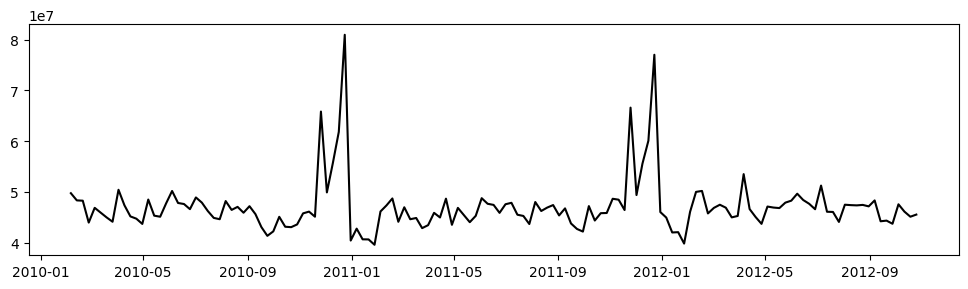

In [ ]:
plt.figure(figsize=(12,3))
plt.plot(base_datas['Weekly_Sales'], color='black')
plt.show()

### **Analisando Tendência, Sazonalidade e Ruído das SOMA de vendas das lojas**

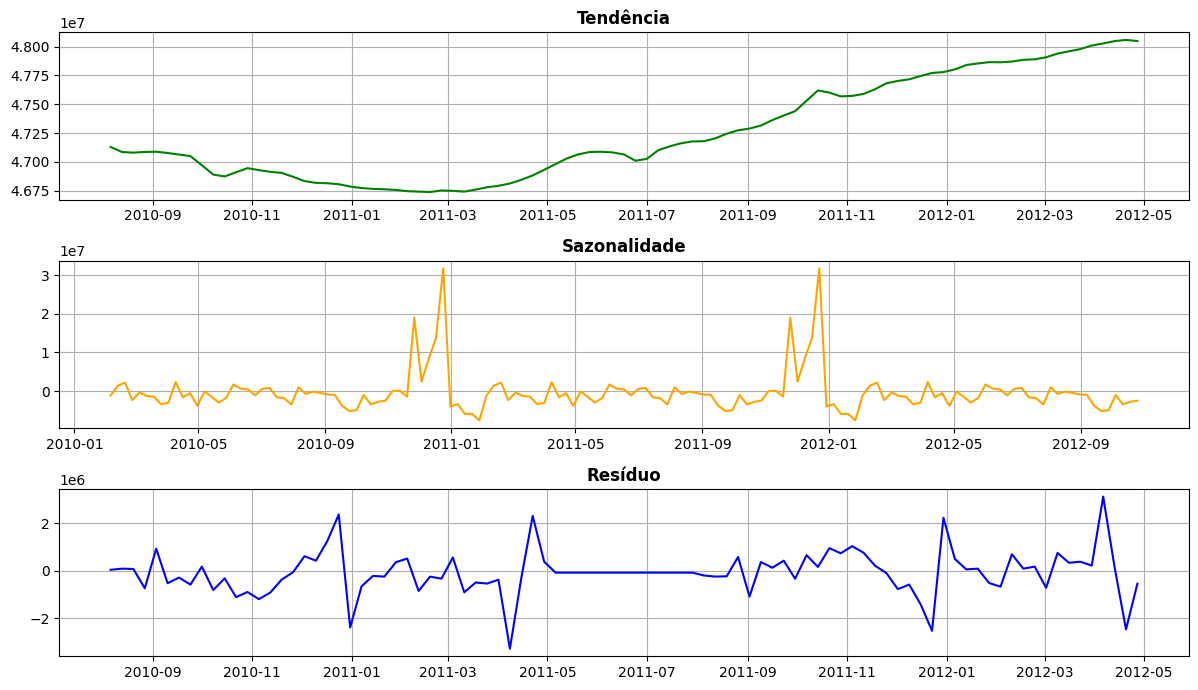

In [ ]:
fig, ax = plt.subplots(nrows=3, figsize=(12,7), tight_layout=True)
ax[0].plot(decomposicao.trend, color='green')
ax[0].set_title("Tendência", fontweight='bold')
ax[1].plot(decomposicao.seasonal, color='orange')
ax[1].set_title("Sazonalidade", fontweight='bold')
ax[2].plot(decomposicao.resid, color='blue')
ax[2].set_title("Resíduo", fontweight='bold')

ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.show()

### **Próximas etapas:**
- Criando uma base para cada tipo de loja
- Agrupando pela data, exibindo a média do período

In [ ]:
tipo_a = base.query('Type == "A"')
tipo_b = base.query('Type == "B"')
tipo_c = base.query('Type == "C"')

In [ ]:
treino_a = tipo_a.copy()
treino_a = treino_a.set_index('Date')
treino_a = treino_a.groupby(treino_a.index)['Weekly_Sales'].mean().reset_index()
treino_a = treino_a.set_index('Date')

treino_b = tipo_b.copy()
treino_b = treino_b.set_index('Date')
treino_b = treino_b.groupby(treino_b.index)['Weekly_Sales'].mean().reset_index()
treino_b = treino_b.set_index('Date')

treino_c = tipo_c.copy()
treino_c = treino_c.set_index('Date')
treino_c = treino_c.groupby(treino_c.index)['Weekly_Sales'].mean().reset_index()
treino_c = treino_c.set_index('Date')

### **Decompondo a série**

In [ ]:
decomposicao_lojas_tipo_A = seasonal_decompose(treino_a['Weekly_Sales'], model='aditive')
decomposicao_lojas_tipo_B = seasonal_decompose(treino_b['Weekly_Sales'], model='aditive')
decomposicao_lojas_tipo_C = seasonal_decompose(treino_c['Weekly_Sales'], model='aditive')

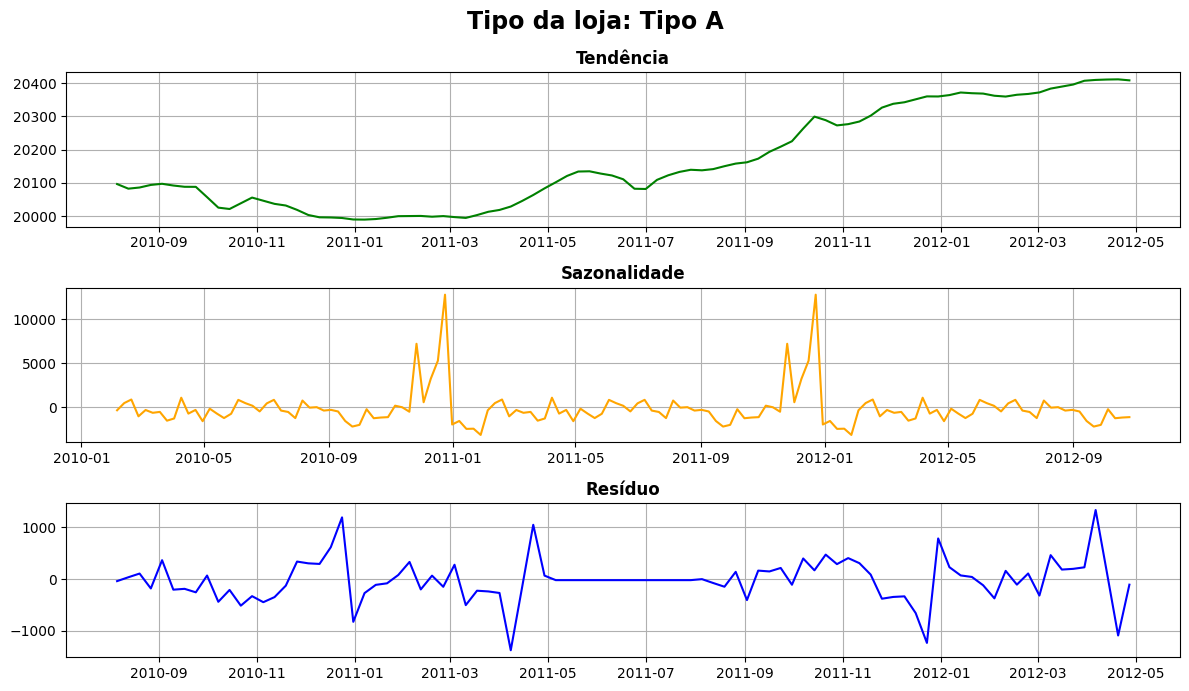

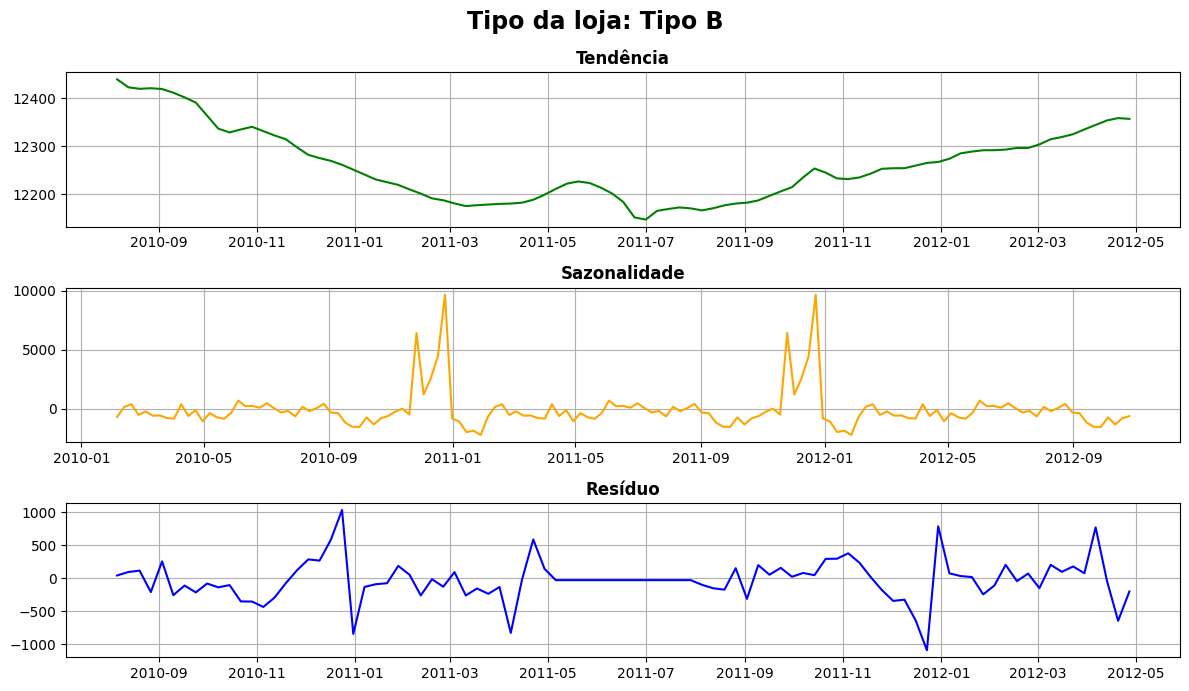

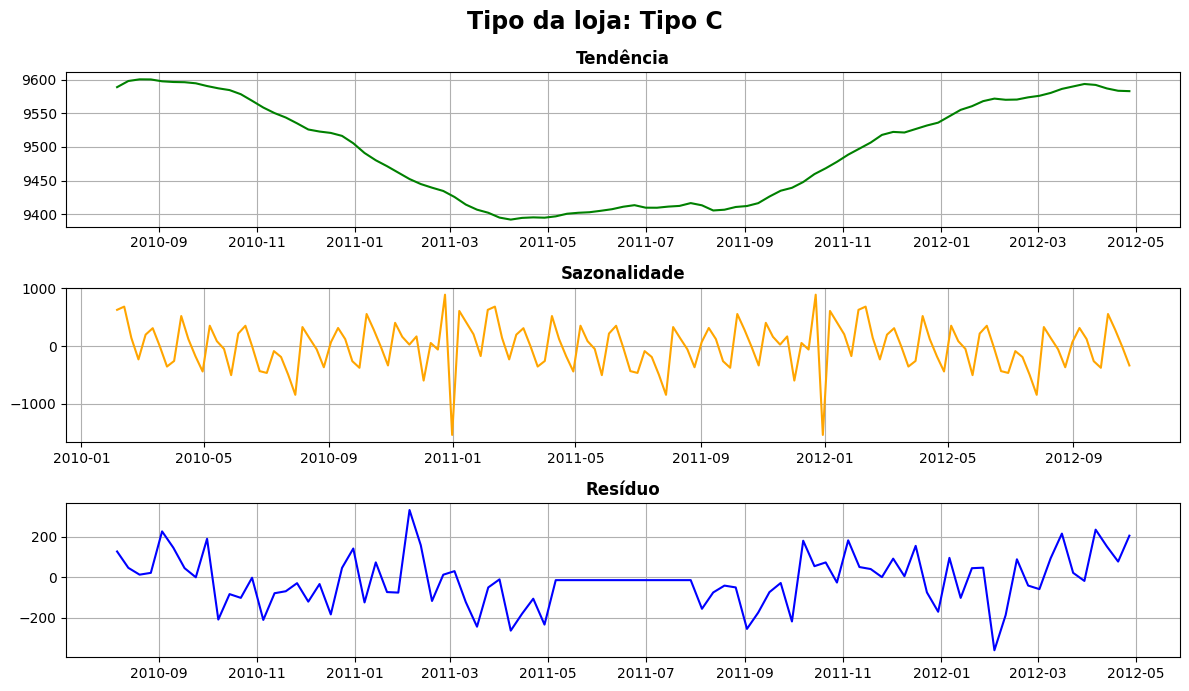

In [ ]:
for i,tipo in zip([decomposicao_lojas_tipo_A, decomposicao_lojas_tipo_B, decomposicao_lojas_tipo_C], ['Tipo A','Tipo B','Tipo C']):

    fig, ax = plt.subplots(nrows=3, figsize=(12,7), tight_layout=True)

    ax[0].plot(i.trend, color='green')
    ax[0].set_title("Tendência", fontweight='bold')
    ax[1].plot(i.seasonal, color='orange')
    ax[1].set_title("Sazonalidade", fontweight='bold')
    ax[2].plot(i.resid, color='blue')
    ax[2].set_title("Resíduo", fontweight='bold')

    ax[0].grid()
    ax[1].grid()
    ax[2].grid()

    plt.suptitle(f"Tipo da loja: {tipo}", fontweight='bold', fontsize=17)
    plt.savefig(f"loja {tipo}.png")
    plt.show()

In [ ]:
print("Média das vendas semanais - Loja do Tipo A: ", round(treino_a.Weekly_Sales.mean(),1))
print("Média das vendas semanais - Loja do Tipo B: ", round(treino_b.Weekly_Sales.mean(),1))
print("Média das vendas semanais - Loja do Tipo C: ", round(treino_c.Weekly_Sales.mean(),1))
print(' ')
print(' ')
print("Soma das vendas semanais - Loja do Tipo A: ", round(treino_a.Weekly_Sales.sum(),1))
print("Soma das vendas semanais - Loja do Tipo B: ", round(treino_b.Weekly_Sales.sum(),1))
print("Soma das vendas semanais - Loja do Tipo C: ", round(treino_c.Weekly_Sales.sum(),1))
print(' ')
print(' ')
print("Menor venda semanal - Loja do Tipo A: ", round(treino_a.Weekly_Sales.min(),1))
print("Menor venda semanal - Loja do Tipo B: ", round(treino_b.Weekly_Sales.min(),1))
print("Menor venda semanal - Loja do Tipo C: ", round(treino_c.Weekly_Sales.min(),1))
print(' ')
print(' ')
print("Maior venda semanal - Loja do Tipo A: ", round(treino_a.Weekly_Sales.max(),1))
print("Maior venda semanal - Loja do Tipo B: ", round(treino_b.Weekly_Sales.max(),1))
print("Maior venda semanal - Loja do Tipo C: ", round(treino_c.Weekly_Sales.max(),1))


Média das vendas semanais - Loja do Tipo A:  20094.0
Média das vendas semanais - Loja do Tipo B:  12232.2
Média das vendas semanais - Loja do Tipo C:  9521.5
 
 
Soma das vendas semanais - Loja do Tipo A:  2873447.6
Soma das vendas semanais - Loja do Tipo B:  1749206.8
Soma das vendas semanais - Loja do Tipo C:  1361580.2
 
 
Menor venda semanal - Loja do Tipo A:  16963.7
Menor venda semanal - Loja do Tipo B:  9808.2
Menor venda semanal - Loja do Tipo C:  7825.2
 
 
Maior venda semanal - Loja do Tipo A:  33970.6
Maior venda semanal - Loja do Tipo B:  22967.8
Maior venda semanal - Loja do Tipo C:  10453.9


In [ ]:
base.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,Unemployment,Agrupamento_temperatura,Day,Month,Year,Total_Flags_MarkDown,Categ_Size
0,1,1,2010-02-05,24924.50,0,A,151315,42.31,2.572,8.106,40 - 59.99,5,2,2010,0,140000 - 169999
1,1,1,2010-02-12,46039.49,1,A,151315,38.51,2.548,8.106,20 - 39.99,12,2,2010,0,140000 - 169999
2,1,1,2010-02-19,41595.55,0,A,151315,39.93,2.514,8.106,20 - 39.99,19,2,2010,0,140000 - 169999
3,1,1,2010-02-26,19403.54,0,A,151315,46.63,2.561,8.106,40 - 59.99,26,2,2010,0,140000 - 169999
4,1,1,2010-03-05,21827.90,0,A,151315,46.50,2.625,8.106,40 - 59.99,5,3,2010,0,140000 - 169999


#### **Olhando a contagem de valores (base original) por data, vemos que algumas datas possuem menos registros que outras**

In [ ]:
base.Date.value_counts()

Date
2011-12-23    3027
2011-11-25    3021
2011-12-16    3013
2011-12-09    3010
2012-02-17    3007
              ... 
2010-07-09    2903
2010-07-16    2901
2010-08-20    2901
2010-08-27    2898
2010-08-13    2896
Name: count, Length: 143, dtype: int64

# **1. ACF e PACF**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

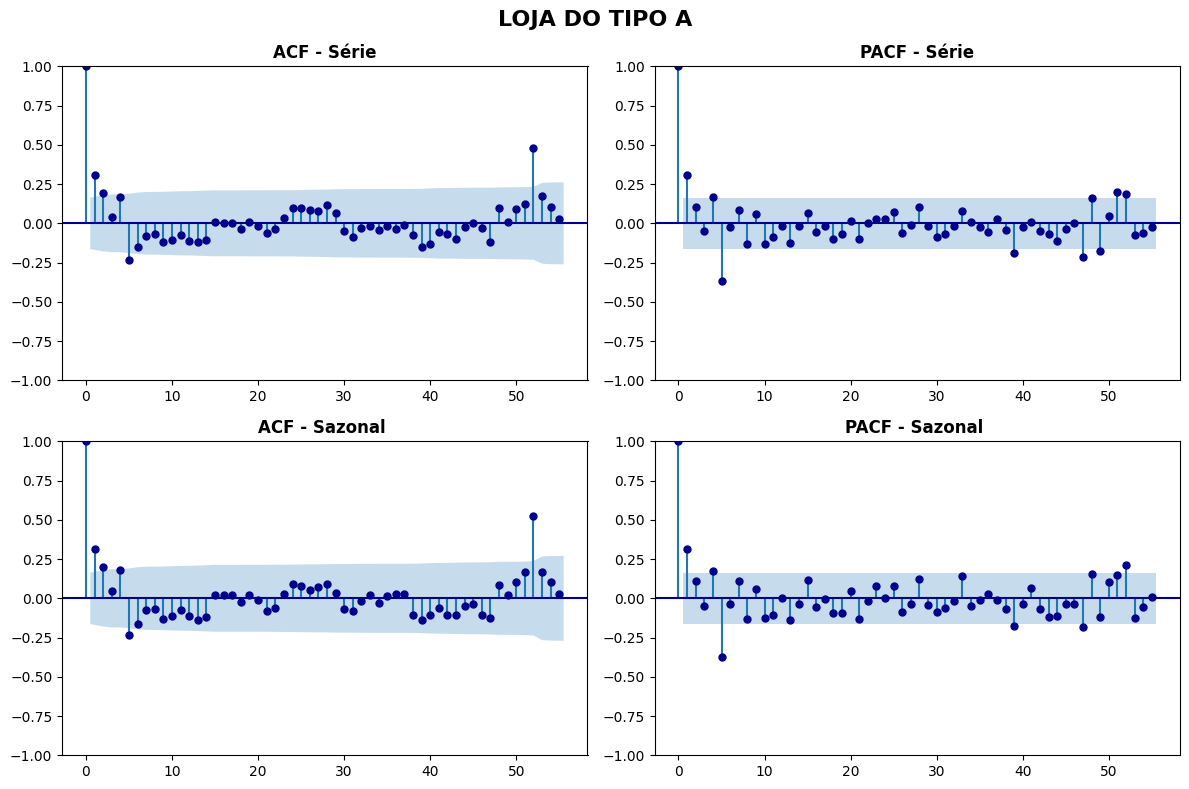

In [ ]:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(12,8), tight_layout=True)

plot_acf(treino_a, lags=55, ax=ax[0][0], color='darkblue')
plot_pacf(treino_a, lags=55, ax=ax[0][1], color='darkblue')

plot_acf(decomposicao_lojas_tipo_A.seasonal, lags=55, ax=ax[1][0], color='darkblue')
plot_pacf(decomposicao_lojas_tipo_A.seasonal, lags=55, ax=ax[1][1], color='darkblue')

ax[0][0].set_title("ACF - Série",fontsize=12, fontweight='bold')
ax[0][1].set_title("PACF - Série",fontsize=12, fontweight='bold')
ax[1][0].set_title("ACF - Sazonal ",fontsize=12, fontweight='bold')
ax[1][1].set_title("PACF - Sazonal ",fontsize=12, fontweight='bold')

plt.suptitle("LOJA DO TIPO A", fontsize=16, fontweight='bold')
plt.savefig("acf_pacf.png")
plt.show()

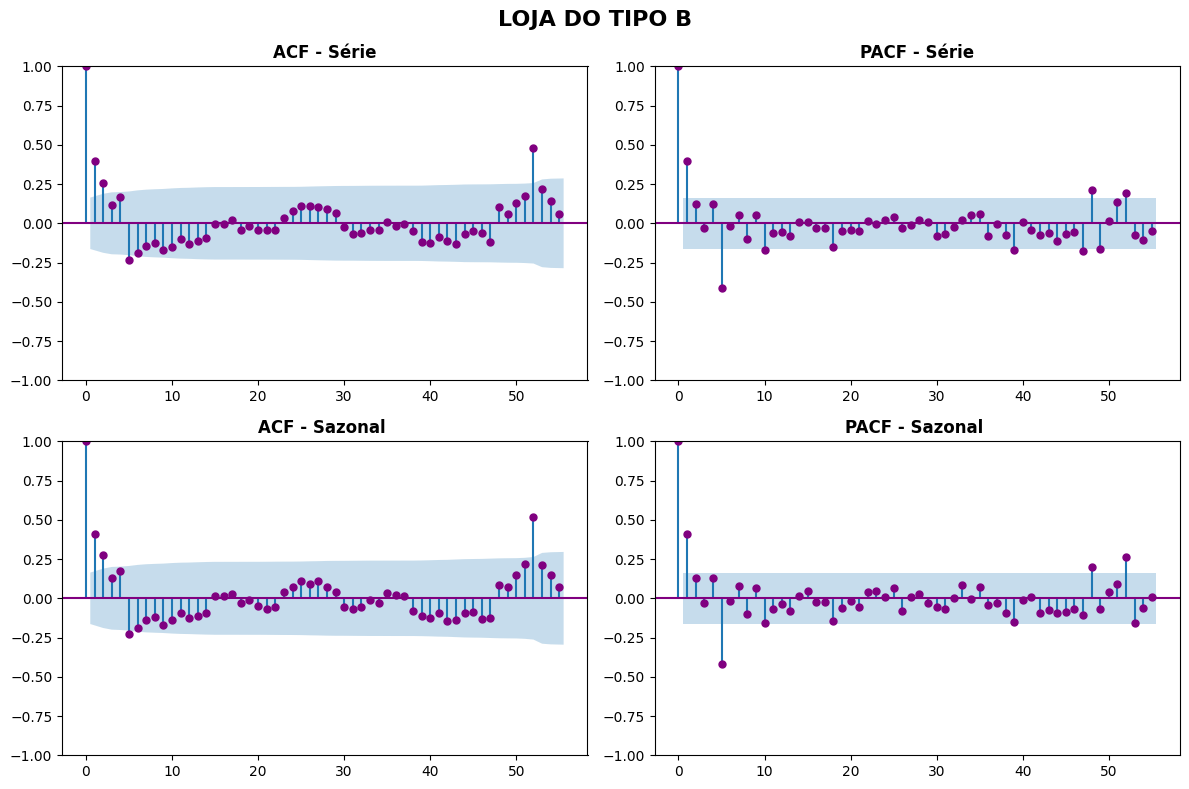

In [ ]:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(12,8), tight_layout=True)

plot_acf(treino_b, lags=55, ax=ax[0][0], color='purple')
plot_pacf(treino_b, lags=55, ax=ax[0][1], color='purple')

plot_acf(decomposicao_lojas_tipo_B.seasonal, lags=55, ax=ax[1][0], color='purple')
plot_pacf(decomposicao_lojas_tipo_B.seasonal, lags=55, ax=ax[1][1], color='purple')

ax[0][0].set_title("ACF - Série",fontsize=12, fontweight='bold')
ax[0][1].set_title("PACF - Série",fontsize=12, fontweight='bold')
ax[1][0].set_title("ACF - Sazonal ",fontsize=12, fontweight='bold')
ax[1][1].set_title("PACF - Sazonal ",fontsize=12, fontweight='bold')

plt.savefig("acf_pacf_B.png")
plt.suptitle("LOJA DO TIPO B", fontsize=16, fontweight='bold')
plt.show()

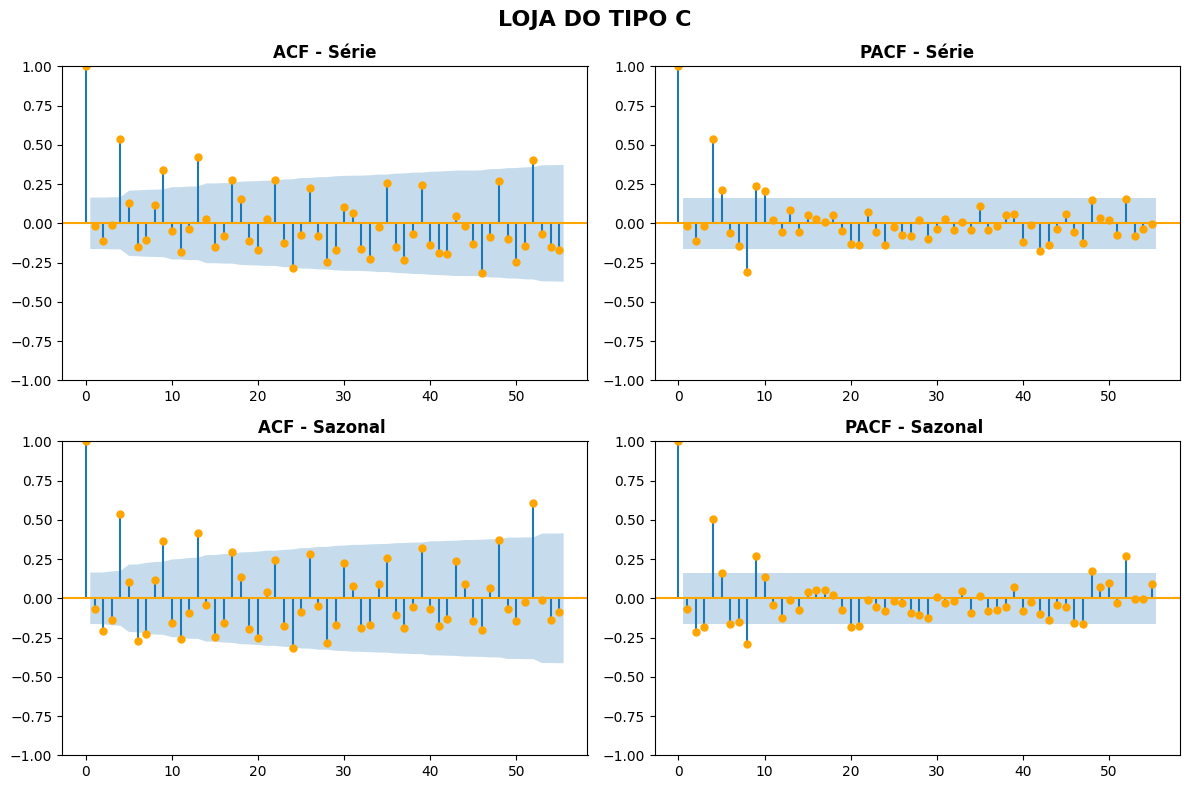

In [ ]:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(12,8), tight_layout=True)

plot_acf(treino_c, lags=55, ax=ax[0][0], color='orange')
plot_pacf(treino_c, lags=55, ax=ax[0][1], color='orange')

plot_acf(decomposicao_lojas_tipo_C.seasonal, lags=55, ax=ax[1][0], color='orange')
plot_pacf(decomposicao_lojas_tipo_C.seasonal, lags=55, ax=ax[1][1], color='orange')

ax[0][0].set_title("ACF - Série",fontsize=12, fontweight='bold')
ax[0][1].set_title("PACF - Série",fontsize=12, fontweight='bold')
ax[1][0].set_title("ACF - Sazonal ",fontsize=12, fontweight='bold')
ax[1][1].set_title("PACF - Sazonal ",fontsize=12, fontweight='bold')

plt.suptitle("LOJA DO TIPO C", fontsize=16, fontweight='bold')
plt.savefig("acf_pacf_C.png")
plt.show()

#### **Conclusão:**
- Há um **aumento interessante do valor ACF na semana 52** (quando completa o período de um ano)

# **2. Teste de Estacionariedade - ADF e KPSS**

## **ADF**

https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

In [ ]:
from statsmodels.tsa.stattools import adfuller

teste_serie_estacionaria_A = adfuller(treino_a)
teste_serie_estacionaria_B = adfuller(treino_b)
teste_serie_estacionaria_C = adfuller(treino_c)

In [ ]:
teste_serie_estacionaria_A

(-5.888957684353418,
 2.955481886110107e-07,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 2316.5884972043214)

In [ ]:
verificar = [teste_serie_estacionaria_A, teste_serie_estacionaria_B, teste_serie_estacionaria_C]

for i,loja in zip(verificar,['A','B','C']):
    print(f"Loja do tipo", loja)
    print("Estatística ADF:     ", i[0])
    print("P-value:             ", i[1])
    print("Valores críticos:    ", i[4])
    print("")

Loja do tipo A
Estatística ADF:      -5.888957684353418
P-value:              2.955481886110107e-07
Valores críticos:     {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}

Loja do tipo B
Estatística ADF:      -6.050061908685673
P-value:              1.2839532377608548e-07
Valores críticos:     {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}

Loja do tipo C
Estatística ADF:      -2.2301706407609636
P-value:              0.1954780138849599
Valores críticos:     {'1%': -3.480500383888377, '5%': -2.8835279559405045, '10%': -2.578495716547007}



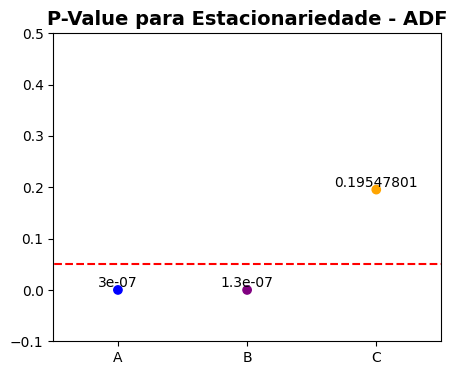

In [ ]:
fig, ax = plt.subplots(figsize=(5,4))
a = np.array([0.05, 0.05, 0.05])
ax.plot([-1,1,3], a, 'r--')
ax.set_xlim([-0.5,2.5])
ax.set_ylim([-0.1, 0.5])
ax.scatter([0,1,2], [teste_serie_estacionaria_A[1],teste_serie_estacionaria_B[1],teste_serie_estacionaria_C[1]], color=['blue','purple','orange'])
ax.set_xticks([0,1,2])
ax.set_xticklabels(['A','B','C'])
for num, i in zip ([0,1,2],[teste_serie_estacionaria_A[1], teste_serie_estacionaria_B[1], teste_serie_estacionaria_C[1]]):
    ax.annotate(round(i,8), (num, i), ha='center', va='bottom', fontsize=10)
ax.set_title('P-Value para Estacionariedade - ADF', fontsize=14, fontweight='bold')
plt.savefig("ADF.png")
plt.show()

Analisando os dados acima,como pvalue e valores críticos/significancia das **lojas A e B**, posso dizer estatísticamente que **as séries são estacinárias**
- Ou seja, não será necessário aplicar técnicas de diferenciação

**Porém, não é o caso da loja do tipo C**, que o **p-value foi superior a 0,05** e o valor da ADF cima dos valores de significancia


## **KPSS**

#### **Houve o aviso:**

- InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

Vamos ter cautela nas análises e interpretações

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from statsmodels.tsa.stattools import kpss

kpss_A = kpss(treino_a, nlags=4)
kpss_B = kpss(treino_b, nlags=4)
kpss_C = kpss(treino_c, nlags=4)

In [ ]:
print('Estatística KPSS:', kpss_A[0])
print('Valor p:', kpss_A[1])
print('Lags utilizados:', kpss_A[2])
print('Valores críticos:', kpss_A[3])

Estatística KPSS: 0.0453337627715918
Valor p: 0.1
Lags utilizados: 4
Valores críticos: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [ ]:
print('Estatística KPSS:', kpss_B[0])
print('Valor p:', kpss_B[1])
print('Lags utilizados:', kpss_B[2])
print('Valores críticos:', kpss_B[3])

Estatística KPSS: 0.04329451120670533
Valor p: 0.1
Lags utilizados: 4
Valores críticos: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [ ]:
print('Estatística KPSS:', kpss_C[0])
print('Valor p:', kpss_C[1])
print('Lags utilizados:', kpss_C[2])
print('Valores críticos:', kpss_C[3])

Estatística KPSS: 0.2101835988626058
Valor p: 0.1
Lags utilizados: 4
Valores críticos: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


**No tipo C o KPSS foi maior que o p-valor e menor que os valores críticos**

**Resposta do Chat GPT para esse caso:**
- "Se a estatística do teste KPSS for maior que o valor p (p-valor), mas menor que os valores críticos, isso significa que a estatística do teste não é grande o suficiente para rejeitar a hipótese nula ao nível de significância especificado pelos valores críticos. Portanto, você não teria evidência suficiente para concluir que a série temporal é não estacionária com base nos resultados do teste KPSS."

# **3. Suavizando as séries com Médias Móveis**

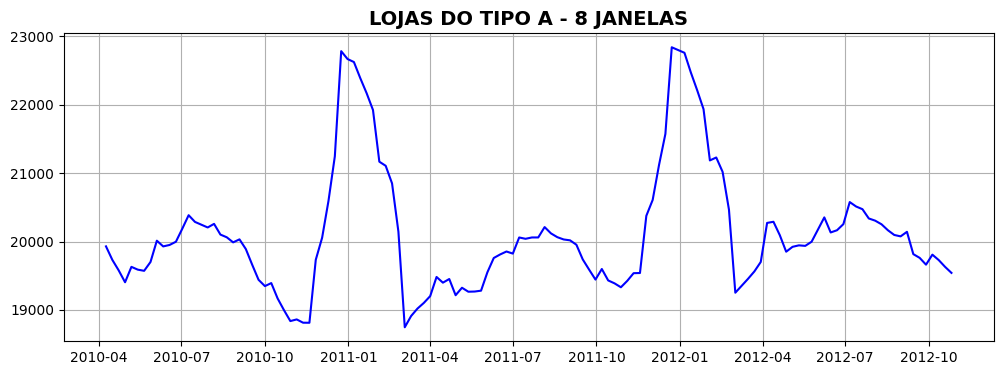

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(treino_a.rolling(10).mean(), color='blue')
ax.set_title('LOJAS DO TIPO A - 8 JANELAS', fontsize=14, fontweight='bold')
ax.grid()
plt.savefig("medias_moveis_a.png")
plt.show()

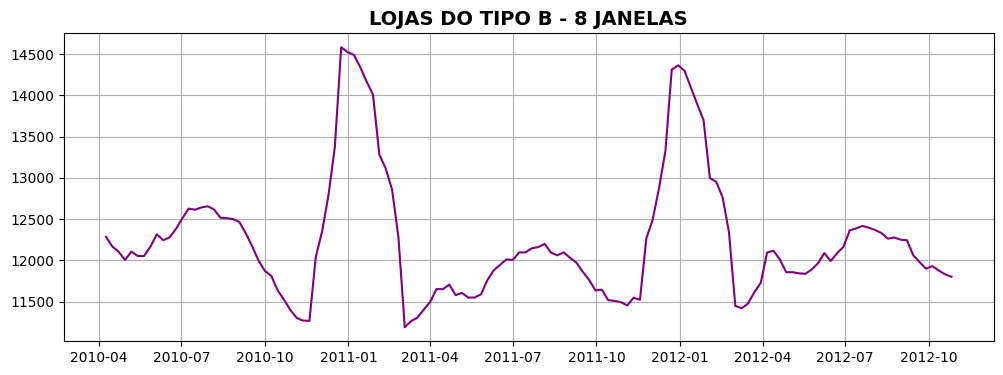

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(treino_b.rolling(10).mean(), color='purple')
ax.set_title('LOJAS DO TIPO B - 8 JANELAS', fontsize=14, fontweight='bold')
ax.grid()
plt.savefig("medias_moveis_b.png")
plt.show()

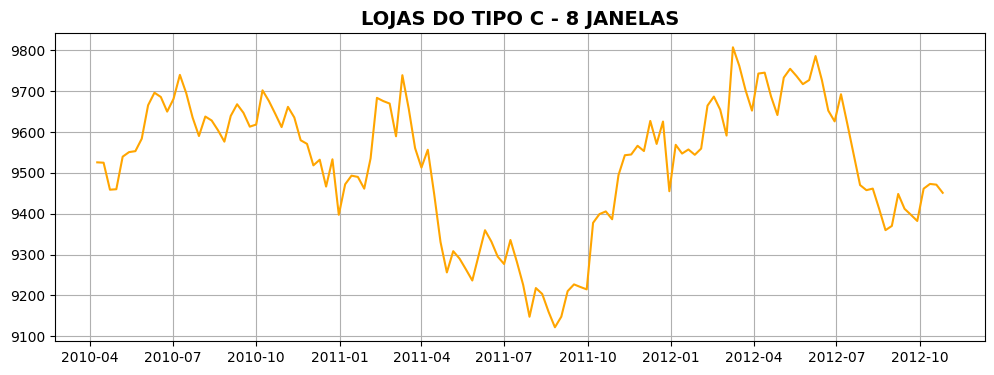

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(treino_c.rolling(10).mean(), color='orange')
ax.set_title('LOJAS DO TIPO C - 8 JANELAS', fontsize=14, fontweight='bold')
ax.grid()
plt.savefig("medias_moveis_c.png")
plt.show()

# **4. Criação do modelo SARIMA**

#### **Warnings que ocorreram**

- No frequency information was provided, so inferred frequency W-FRI will be used.
- No frequency information was provided, so inferred frequency W-FRI will be used.
- UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
- ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
- warnings.warn("Maximum Likelihood optimization failed to "

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## **Tipo A**

#### **Separando em treino e teste**

In [ ]:
treino_a.shape, treino_b.shape, treino_c.shape

((143, 1), (143, 1), (143, 1))

In [ ]:
treino_a_t = treino_a[:118]
validacao_a = treino_a[118:]

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
modelo = SARIMAX(treino_a_t, order=(5, 0, 1), seasonal_order=(1, 1, 1, 52))
modelo_sarima = modelo.fit()

In [ ]:
modelo_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  118
Model:             SARIMAX(5, 0, 1)x(1, 1, 1, 52)   Log Likelihood                -540.995
Date:                            Mon, 06 May 2024   AIC                           1099.990
Time:                                    23:03:36   BIC                           1119.697
Sample:                                02-05-2010   HQIC                          1107.777
                                     - 05-04-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9632      0.321      3.002      0.003       0.334       1.592
ar.L2         -0.1825      0.231     -0.792      0.428      -0.634       0.269
ar.L3          0.0860      0.222      0.387      0.699      -0.350       0.522
ar.L4          0.1051      0.267      0.393      0.694      -0.419       0.629
ar.L5         -0.0948      0.150     -0.633      0.527      -0.388       0.198
ma.L1         -0.8753      0.288     -3.040      0.002      -1.440      -0.311
ar.S.L52      -0.3740     27.323     -0.014      0.989     -53.925      53.178
ma.S.L52       0.3750     27.316      0.014      0.989     -53.164      53.914
sigma2      7.796e+05      0.005   1.71e+08      0.000     7.8e+05     7.8e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):                15.69
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):               1.78   Skew:                            -0.07
Prob(H) (two-sided):                  0.19   Kurtosis:                         5.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.27e+23. Standard errors may be unstable.
"""

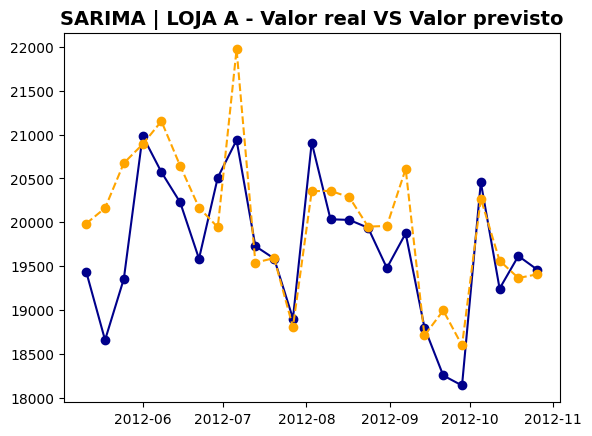

In [ ]:
forecast = modelo_sarima.get_forecast(steps=25)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.title("SARIMA | LOJA A - Valor real VS Valor previsto", fontsize=14, fontweight='bold')
plt.plot(forecast_mean, color='darkblue',marker='o')
plt.plot(validacao_a,'o--', color='orange')
plt.savefig("sarima_a.png")
plt.show()

## **Tipo B**

In [ ]:
treino_b_t = treino_b[:118]
validacao_b = treino_b[118:]

In [ ]:
validacao_b.shape

(25, 1)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
modelo_b = SARIMAX(treino_b_t, order=(5, 0, 1), seasonal_order=(1, 1, 1, 52))
modelo_sarima_b = modelo_b.fit()

In [ ]:
modelo_sarima_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  118
Model:             SARIMAX(5, 0, 1)x(1, 1, 1, 52)   Log Likelihood                -515.547
Date:                            Mon, 06 May 2024   AIC                           1049.093
Time:                                    23:04:04   BIC                           1068.800
Sample:                                02-05-2010   HQIC                          1056.880
                                     - 05-04-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3820      4.271      0.089      0.929      -7.990       8.753
ar.L2         -0.1057      0.365     -0.290      0.772      -0.821       0.610
ar.L3          0.0011      0.415      0.003      0.998      -0.813       0.815
ar.L4         -0.0038      0.279     -0.014      0.989      -0.551       0.543
ar.L5         -0.0231      0.311     -0.074      0.941      -0.634       0.587
ma.L1         -0.3042      4.290     -0.071      0.943      -8.713       8.104
ar.S.L52      -0.6910      0.799     -0.865      0.387      -2.257       0.875
ma.S.L52       0.6049      0.824      0.734      0.463      -1.011       2.221
sigma2      4.202e+05   7.85e+04      5.355      0.000    2.66e+05    5.74e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.34   Jarque-Bera (JB):                12.76
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               1.73   Skew:                             0.11
Prob(H) (two-sided):                  0.21   Kurtosis:                         5.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

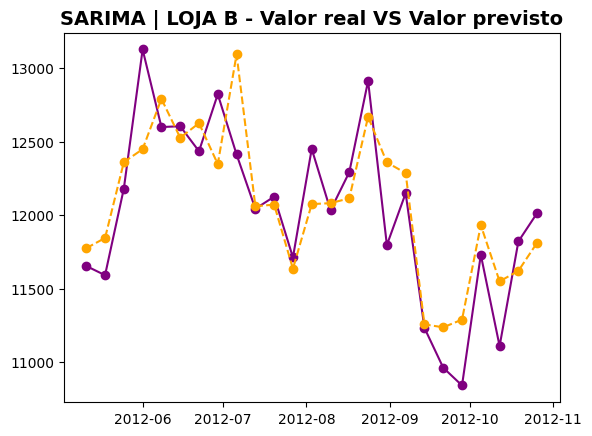

In [ ]:
forecast_b = modelo_sarima_b.get_forecast(steps=25)
forecast_mean_b = forecast_b.predicted_mean
forecast_ci_b = forecast_b.conf_int()

plt.title("SARIMA | LOJA B - Valor real VS Valor previsto", fontsize=14, fontweight='bold')
plt.plot(forecast_mean_b, color='purple',marker='o')
plt.plot(validacao_b,'o--', color='orange')
plt.savefig("sarima_b.png")
plt.show()

## **Tipo C**

In [ ]:
treino_c_t = treino_c[:118]
validacao_c = treino_c[118:]

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
modelo_c = SARIMAX(treino_c_t, order=(4, 1, 1), seasonal_order=(2, 1, 1, 52))
modelo_sarima_c = modelo_c.fit()

In [ ]:
modelo_sarima_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  118
Model:             SARIMAX(4, 1, 1)x(2, 1, 1, 52)   Log Likelihood                -456.178
Date:                            Mon, 06 May 2024   AIC                            930.357
Time:                                    23:05:34   BIC                            949.926
Sample:                                02-05-2010   HQIC                           938.078
                                     - 05-04-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1010      0.524     -2.101      0.036      -2.128      -0.074
ar.L2         -0.6415      0.326     -1.966      0.049      -1.281      -0.002
ar.L3         -0.3096      0.310     -0.997      0.319      -0.918       0.299
ar.L4          0.0421      0.196      0.215      0.830      -0.342       0.426
ma.L1          0.6268      0.507      1.235      0.217      -0.368       1.621
ar.S.L52      -0.0962     17.602     -0.005      0.996     -34.595      34.402
ar.S.L104     -0.8377      1.686     -0.497      0.619      -4.141       2.466
ma.S.L52       0.1487     59.249      0.003      0.998    -115.977     116.275
sigma2      2.084e+04      0.015   1.42e+06      0.000    2.08e+04    2.08e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.77
Prob(Q):                              0.99   Prob(JB):                         0.15
Heteroskedasticity (H):               0.79   Skew:                            -0.54
Prob(H) (two-sided):                  0.59   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.55e+23. Standard errors may be unstable.
"""

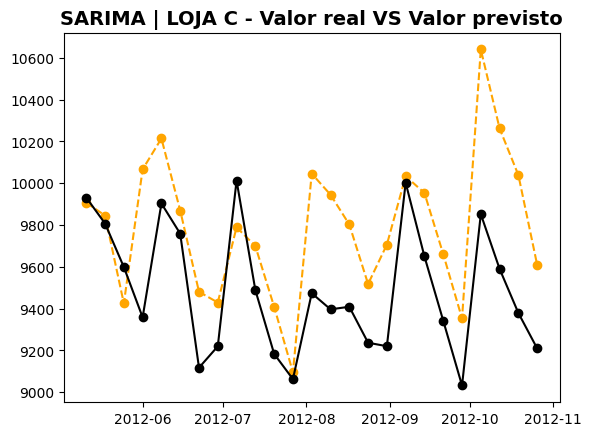

In [ ]:
forecast_c = modelo_sarima_c.get_forecast(steps=25)
forecast_mean_c = forecast_c.predicted_mean
forecast_ci_c = forecast_c.conf_int()

plt.title("SARIMA | LOJA C - Valor real VS Valor previsto", fontsize=14, fontweight='bold')
plt.plot(forecast_mean_c,'o--', color='orange')
plt.plot(validacao_c, color='black', marker='o')
plt.savefig("sarima_c.png")
plt.show()

# **5. Resíduos**

In [ ]:
residuos_A = modelo_sarima.resid
residuos_B = modelo_sarima_b.resid
residuos_C = modelo_sarima_c.resid

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

teste_ruido_branco_A = acorr_ljungbox(residuos_A)
teste_ruido_branco_B = acorr_ljungbox(residuos_B)
teste_ruido_branco_C = acorr_ljungbox(residuos_C)

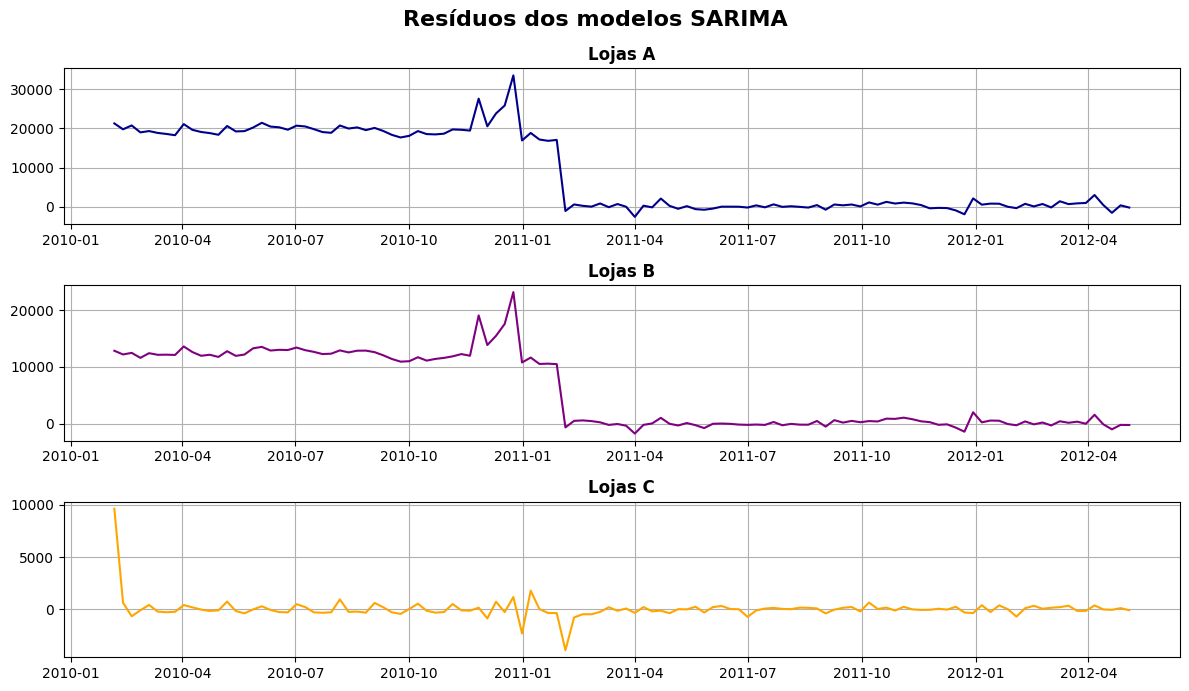

In [ ]:
fig,ax = plt.subplots(nrows=3, figsize=(12,7), tight_layout=True)

ax[0].plot(residuos_A, color='darkblue')
ax[1].plot(residuos_B, color='purple')
ax[2].plot(residuos_C, color='orange')

ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].set_title("Lojas A",fontsize=12,fontweight='bold')
ax[1].set_title("Lojas B",fontsize=12,fontweight='bold')
ax[2].set_title("Lojas C",fontsize=12,fontweight='bold')

plt.suptitle("Resíduos dos modelos SARIMA",fontsize=16,fontweight='bold')
plt.savefig("residuos.png")
plt.show()


**É importante analisar o resíduo da série para detectar se o modelo conseguiu decompor a série corretamente, o resíduo deve variar próximo a 0**

# **6. Avaliação das previsões do modelo - MAE e RSME**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
resultados_A = pd.DataFrame({"Real":validacao_a.Weekly_Sales,"Previsto":forecast_mean})
resultados_B = pd.DataFrame({"Real":validacao_b.Weekly_Sales,"Previsto":forecast_mean_b})
resultados_C = pd.DataFrame({"Real":validacao_c.Weekly_Sales,"Previsto":forecast_mean_c})

In [ ]:
resultados_A.head()

,Real,Previsto
2012-05-11,19985.196770,19433.524787
2012-05-18,20161.366344,18656.144994
2012-05-25,20674.660894,19354.804554
2012-06-01,20888.924125,20984.449668
2012-06-08,21152.538443,20570.998980


In [ ]:
resultados_A['Diferença absoluta'] = abs(resultados_A['Real'] - resultados_A['Previsto'])
resultados_B['Diferença absoluta'] = abs(resultados_B['Real'] - resultados_B['Previsto'])
resultados_C['Diferença absoluta'] = abs(resultados_C['Real'] - resultados_C['Previsto'])

In [ ]:
MAE_A = mean_absolute_error(validacao_a, forecast_mean)
MAE_B = mean_absolute_error(validacao_b, forecast_mean_b)
MAE_C = mean_absolute_error(validacao_c, forecast_mean_c)

MSE_A = mean_squared_error(validacao_a, forecast_mean)
MSE_B = mean_squared_error(validacao_b, forecast_mean_b)
MSE_C = mean_squared_error(validacao_c, forecast_mean_c)

In [ ]:
print("Valor médio das 25 previsões - Tipo A: ", forecast_mean.mean())
print("Valor médio das 25 previsões - Tipo B: ", forecast_mean_b.mean())
print("Valor médio das 25 previsões - Tipo C: ", forecast_mean_c.mean())
print("")
print("O Erro Médio Absoluto do modelo Sarima_A é: ", round(MAE_A,1))
print("O Erro Médio Absoluto do modelo Sarima_B é: ", round(MAE_B,1))
print("O Erro Médio Absoluto do modelo Sarima_C é: ", round(MAE_C,1))
print(" ")
print("A Raiz do Erro Médio Quadrático do modelo Sarima_A é: ", round(np.sqrt(MSE_A),1))
print("A Raiz do Erro Médio Quadrático do modelo Sarima_B é: ", round(np.sqrt(MSE_B),1))
print("A Raiz do Erro Médio Quadrático do modelo Sarima_C é: ", round(np.sqrt(MSE_C),1))
print("")
print("Diferença média da previsão comparada a média das previsões - Sarima_A: ", round((MAE_A/forecast_mean.mean())*100,2),"%")
print("Diferença média da previsão comparada a média das previsões - Sarima_B: ", round((MAE_B/forecast_mean_b.mean())*100,2),"%")
print("Diferença média da previsão comparada a média das previsões - Sarima_C: ", round((MAE_C/forecast_mean_c.mean())*100,2),"%")

Valor médio das 25 previsões - Tipo A:  19707.491446066833
Valor médio das 25 previsões - Tipo B:  12025.944084838766
Valor médio das 25 previsões - Tipo C:  9791.686816921012

O Erro Médio Absoluto do modelo Sarima_A é:  456.5
O Erro Médio Absoluto do modelo Sarima_B é:  253.5
O Erro Médio Absoluto do modelo Sarima_C é:  336.3
 
A Raiz do Erro Médio Quadrático do modelo Sarima_A é:  594.3
A Raiz do Erro Médio Quadrático do modelo Sarima_B é:  317.1
A Raiz do Erro Médio Quadrático do modelo Sarima_C é:  401.4

Diferença média da previsão comparada a média das previsões - Sarima_A:  2.32 %
Diferença média da previsão comparada a média das previsões - Sarima_B:  2.11 %
Diferença média da previsão comparada a média das previsões - Sarima_C:  3.43 %


**O RSME é importante na análise, pois por ser quadrático, é mais sensível a diferenças muito grandes dos dados reais com as previsões. Mostrando possíveis deficiências do modelo com relação a valores distantes.**

# **7. Modelo de Random Forest simples**

#### **Prevendo as vendas da semanas seguintes:**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=90, max_depth=5)

In [ ]:
treino_a_t['shift 1'] = treino_a_t.Weekly_Sales.shift(1)
treino_a_t['shift 2'] = treino_a_t.Weekly_Sales.shift(2)
treino_a_t['shift 3'] = treino_a_t.Weekly_Sales.shift(3)
treino_a_t['shift 4'] = treino_a_t.Weekly_Sales.shift(4)
treino_a_t['shift 5'] = treino_a_t.Weekly_Sales.shift(5)

In [ ]:
treino_a_t.head(6)

,Weekly_Sales,shift 1,shift 2,shift 3,shift 4,shift 5
Date,,,,,,
2010-02-05,21259.342758,NaN,NaN,NaN,NaN,NaN
2010-02-12,20491.118247,21259.342758,NaN,NaN,NaN,NaN
2010-02-19,20408.211165,20491.118247,21259.342758,NaN,NaN,NaN
2010-02-26,18598.270910,20408.211165,20491.118247,21259.342758,NaN,NaN
2010-03-05,19881.154702,18598.270910,20408.211165,20491.118247,21259.342758,NaN
2010-03-12,19532.969681,19881.154702,18598.270910,20408.211165,20491.118247,21259.342758


In [ ]:
treino_a_t.tail()

,Weekly_Sales,shift 1,shift 2,shift 3,shift 4,shift 5
Date,,,,,,
2012-04-06,22846.053734,19384.953807,19095.151418,20069.105616,20237.807918,19768.331817
2012-04-13,19841.745069,22846.053734,19384.953807,19095.151418,20069.105616,20237.807918
2012-04-20,19047.698773,19841.745069,22846.053734,19384.953807,19095.151418,20069.105616
2012-04-27,18745.652510,19047.698773,19841.745069,22846.053734,19384.953807,19095.151418
2012-05-04,20185.878580,18745.652510,19047.698773,19841.745069,22846.053734,19384.953807


In [ ]:
treino_a_t = treino_a_t.dropna()

In [ ]:
treino_a_t.tail(1).drop('Weekly_Sales',axis=1)

,shift 1,shift 2,shift 3,shift 4,shift 5
Date,,,,,
2012-05-04,18745.65251,19047.698773,19841.745069,22846.053734,19384.953807


In [ ]:
x_treino_A = treino_a_t.drop("Weekly_Sales",axis=1)
y_treino_A = treino_a_t.Weekly_Sales

In [ ]:
reg_rfr = rfr.fit(x_treino_A, y_treino_A)

In [ ]:
ultimo = treino_a_t.tail(1).drop('Weekly_Sales',axis=1)

#### **Comparando o valor real e o valor previsto**

In [ ]:
# Previsão
reg_rfr.predict(ultimo)

array([19873.56820525])

In [ ]:
# Valor real
validacao_a.head(1)['Weekly_Sales'].values

array([19985.19676974])

### **Criando função para incrementar o valor de previsão em uma nova linha, e trazer os valores anteriores. Para prever mais de uma semana**

In [ ]:
def prever_mais_semanas(num_semanas, x_treino_A=x_treino_A):
  reg_rfr = rfr.fit(x_treino_A, y_treino_A)
  previsoes = []
  for i in range(num_semanas):
    ultimo = x_treino_A.tail(1)
    previsao = reg_rfr.predict(ultimo)
    nova_linha = pd.DataFrame({"shift 1":previsao,"shift 2":ultimo["shift 1"],"shift 3":ultimo["shift 2"],"shift 4":ultimo["shift 3"],"shift 5":ultimo["shift 4"]})
    x_treino_A = pd.concat([x_treino_A, nova_linha], axis=0)
    previsoes.append(previsao)
  #return x_treino_A.tail(num_semanas).reset_index(drop=True)
  return previsoes

#### **Comparando**

In [ ]:
# Previsões
prever_mais_semanas(3)

[array([20160.18155191]), array([19235.24892651]), array([19660.06921542])]

In [ ]:
# Valores reais
validacao_a['Weekly_Sales'].head(3).to_list()

[19985.19676973684, 20161.366344229486, 20674.660893817203]

**Como o foco são as séries temporais e seus componentes, não vou me aprofundar tanto nesse modelo. Porém, poderiam ser feitas muitas coisas para a melhoria das previsões em geral, como:**
- Seleção de features de maior peso
- Mudança no número de shifs
- Tunagem de hiperparâmeros
- Adicionar colunas com mês e ano
- Acrescentar features, como: "IsHoliday"

In [ ]:
x_treino_A['Mês'] = x_treino_A.index.month
x_treino_A['Ano'] = x_treino_A.index.year

In [ ]:
x_treino_A.head(5)

,shift 1,shift 2,shift 3,shift 4,shift 5,Mês,Ano
Date,,,,,,,
2010-03-12,19881.154702,18598.270910,20408.211165,20491.118247,21259.342758,3,2010
2010-03-19,19532.969681,19881.154702,18598.270910,20408.211165,20491.118247,3,2010
2010-03-26,19026.191661,19532.969681,19881.154702,18598.270910,20408.211165,3,2010
2010-04-02,18544.849115,19026.191661,19532.969681,19881.154702,18598.270910,4,2010
2010-04-09,21457.470066,18544.849115,19026.191661,19532.969681,19881.154702,4,2010


# **8. Aplicando os modelos SARIMAX (Com variável exógena) na base de teste**

In [ ]:
teste = pd.read_csv("test.csv")
teste.shape

(115064, 4)

In [ ]:
teste.head(3)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False


#### **Função para transformar os dados de teste**

In [ ]:
def funcao_transformar_dados(tipo, base_teste, base_lojas):

  base_teste['Date'] = pd.to_datetime(base_teste['Date'], format="%Y-%m-%d")
  base_teste = pd.merge(base_teste, lojas[['Store','Type']], on='Store', how='left')
  base_teste = base_teste.drop(['Dept','Store'],axis=1)
  base_teste = base_teste.drop_duplicates(subset=['Date','Type'])
  base_teste['IsHoliday'] = base_teste['IsHoliday'].apply(lambda x:1 if x == True else 0)

  base_tipo = base_teste.loc[base_teste.Type == tipo].copy()
  base_tipo = base_tipo.drop('Type',axis=1)
  base_tipo = base_tipo.set_index("Date")

  return base_tipo

### **Loja Tipo A**

In [ ]:
teste_loja_A = funcao_transformar_dados("A",teste, lojas)

In [ ]:
teste_loja_A.head()

,IsHoliday
Date,
2012-11-02,0
2012-11-09,0
2012-11-16,0
2012-11-23,1
2012-11-30,0


In [ ]:
teste_loja_A.shape

(39, 1)

In [ ]:
validacao_a.tail(3)

,Weekly_Sales
Date,
2012-10-12,19561.138621
2012-10-19,19363.490262
2012-10-26,19405.926256


#### **Treinando o modelo SARIMA com todos os dados da base de treino**

In [ ]:
datas_e_feriados = tipo_a[['Date','IsHoliday']].copy()
datas_e_feriados = datas_e_feriados.drop_duplicates(subset='Date')
treino_a2 = pd.merge(treino_a, datas_e_feriados, left_on=treino_a.index, right_on='Date',how='left')
treino_a2 = treino_a2.set_index('Date')
treino_a2

,Weekly_Sales,IsHoliday
Date,,
2010-02-05,21259.342758,0
2010-02-12,20491.118247,1
2010-02-19,20408.211165,0
2010-02-26,18598.270910,0
2010-03-05,19881.154702,0
...,...,...
2012-09-28,18594.622312,0
2012-10-05,20268.268798,0
2012-10-12,19561.138621,0


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
modelox = SARIMAX(treino_a2['Weekly_Sales'], order=(5, 0, 1), seasonal_order=(1, 1, 1, 52),exog=treino_a2['IsHoliday'])
modelo_sarimax = modelox.fit()

In [ ]:
modelo_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(5, 0, 1)x(1, 1, 1, 52)   Log Likelihood                -737.219
Date:                            Mon, 06 May 2024   AIC                           1494.438
Time:                                    23:06:20   BIC                           1519.547
Sample:                                02-05-2010   HQIC                          1504.568
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
IsHoliday   9.989e-05   1194.037   8.37e-08      1.000   -2340.270    2340.270
ar.L1          0.9315      1.053      0.885      0.376      -1.132       2.995
ar.L2         -0.1595      0.189     -0.846      0.398      -0.529       0.210
ar.L3          0.0569      0.152      0.374      0.708      -0.241       0.355
ar.L4          0.0682      0.201      0.339      0.734      -0.326       0.462
ar.L5         -0.0520      0.113     -0.462      0.644      -0.273       0.169
ma.L1         -0.8396      1.044     -0.804      0.421      -2.886       1.207
ar.S.L52      -0.9559      1.215     -0.787      0.432      -3.338       1.426
ma.S.L52       0.9403      1.272      0.739      0.460      -1.554       3.434
sigma2      6.465e+05      0.381    1.7e+06      0.000    6.47e+05    6.47e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):                33.63
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               1.13   Skew:                            -0.11
Prob(H) (two-sided):                  0.75   Kurtosis:                         5.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.11e+22. Standard errors may be unstable.
"""

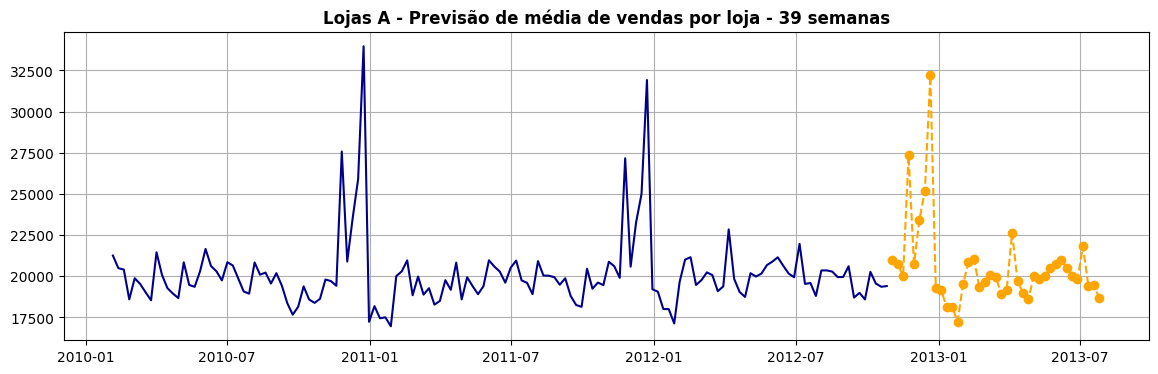

In [ ]:
forecast = modelo_sarimax.get_forecast(steps=39, exog=teste_loja_A['IsHoliday'])
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(14,4))
plt.plot(forecast_mean,'o--', color='orange')
plt.plot(treino_a['Weekly_Sales'], color='darkblue')
plt.title("Lojas A - Previsão de média de vendas por loja - 39 semanas", fontweight='bold')
plt.grid()
plt.savefig("previsao_a.png")
plt.show()

De acordo com o modelo, haverá um crescimento na média de vendas por volta de dezembro, uma queda em janeiro, e depois alguns picos e quedas, porém com uma tendência mais normalizada.

### **Loja Tipo B**

In [ ]:
teste_loja_B = funcao_transformar_dados("B",teste, lojas)

In [ ]:
datas_e_feriados = tipo_b[['Date','IsHoliday']].copy()
datas_e_feriados = datas_e_feriados.drop_duplicates(subset='Date')
treino_b2 = pd.merge(treino_b, datas_e_feriados, left_on=treino_b.index, right_on='Date',how='left')
treino_b2 = treino_b2.set_index('Date')

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
modelo_bx = SARIMAX(treino_b2['Weekly_Sales'], order=(4, 1, 1), seasonal_order=(2, 1, 1, 52), exog=treino_b2['IsHoliday'])
modelo_sarimax_bx = modelo_bx.fit()

In [ ]:
modelo_sarimax_bx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(4, 1, 1)x(2, 1, 1, 52)   Log Likelihood                -686.780
Date:                            Mon, 06 May 2024   AIC                           1393.559
Time:                                    23:08:35   BIC                           1418.557
Sample:                                02-05-2010   HQIC                          1403.640
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
IsHoliday      2.7738    927.717      0.003      0.998   -1815.518    1821.066
ar.L1          0.2701      0.117      2.312      0.021       0.041       0.499
ar.L2          0.0761      0.153      0.497      0.619      -0.224       0.376
ar.L3          0.0733      0.109      0.673      0.501      -0.140       0.287
ar.L4          0.0587      0.120      0.489      0.625      -0.176       0.294
ma.L1         -0.9573      0.151     -6.320      0.000      -1.254      -0.660
ar.S.L52      -1.4761      1.802     -0.819      0.413      -5.008       2.056
ar.S.L104     -0.4773      0.364     -1.310      0.190      -1.192       0.237
ma.S.L52       0.9990      2.286      0.437      0.662      -3.481       5.479
sigma2      2.186e+05      0.025    8.7e+06      0.000    2.19e+05    2.19e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.67   Jarque-Bera (JB):                15.17
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                             0.33
Prob(H) (two-sided):                  0.79   Kurtosis:                         4.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.39e+25. Standard errors may be unstable.
"""

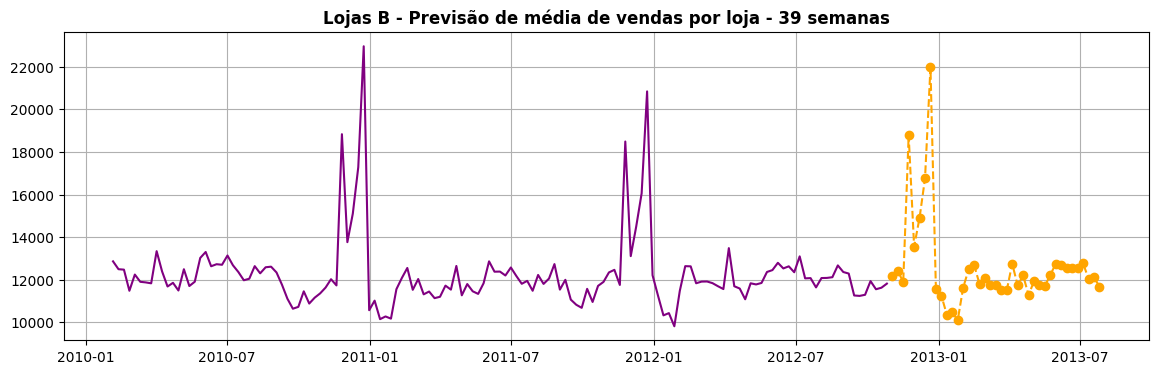

In [ ]:
forecast_b = modelo_sarimax_bx.get_forecast(steps=39, exog=teste_loja_B['IsHoliday'])
forecast_mean_b = forecast_b.predicted_mean
forecast_ci_b = forecast_b.conf_int()

plt.figure(figsize=(14,4))
plt.plot(forecast_mean_b,'o--', color='orange')
plt.plot(treino_b2['Weekly_Sales'], color='purple')
plt.title("Lojas B - Previsão de média de vendas por loja - 39 semanas", fontweight='bold')
plt.grid()
plt.savefig("previsao_b.png")
plt.show()

### **Loja Tipo C**

In [ ]:
teste_loja_C = funcao_transformar_dados("C",teste, lojas)

In [ ]:
datas_e_feriados = tipo_c[['Date','IsHoliday']].copy()
datas_e_feriados = datas_e_feriados.drop_duplicates(subset='Date')
treino_c2 = pd.merge(treino_c, datas_e_feriados, left_on=treino_c.index, right_on='Date',how='left')
treino_c2 = treino_c2.set_index('Date')

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
modelo_cx = SARIMAX(treino_c2['Weekly_Sales'], order=(4, 1, 1), seasonal_order=(2, 1, 1, 52), exog=treino_c2['IsHoliday'])
modelo_sarimax_cx = modelo_cx.fit()

In [ ]:
modelo_sarimax_cx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(4, 1, 1)x(2, 1, 1, 52)   Log Likelihood                -629.699
Date:                            Mon, 06 May 2024   AIC                           1279.399
Time:                                    23:10:43   BIC                           1304.397
Sample:                                02-05-2010   HQIC                          1289.479
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
IsHoliday     -0.2065   2463.574  -8.38e-05      1.000   -4828.722    4828.309
ar.L1         -1.2047      0.513     -2.351      0.019      -2.209      -0.200
ar.L2         -0.8031      0.340     -2.364      0.018      -1.469      -0.137
ar.L3         -0.3952      0.311     -1.271      0.204      -1.005       0.214
ar.L4          0.0054      0.166      0.033      0.974      -0.321       0.332
ma.L1          0.6355      0.521      1.219      0.223      -0.386       1.657
ar.S.L52      -0.9589      5.842     -0.164      0.870     -12.410      10.492
ar.S.L104     -0.4936      0.852     -0.580      0.562      -2.163       1.175
ma.S.L52       0.5512      7.397      0.075      0.941     -13.946      15.049
sigma2      5.193e+04      0.033   1.57e+06      0.000    5.19e+04    5.19e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.62
Prob(Q):                              1.00   Prob(JB):                         0.02
Heteroskedasticity (H):               0.69   Skew:                            -0.64
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.84e+25. Standard errors may be unstable.
"""

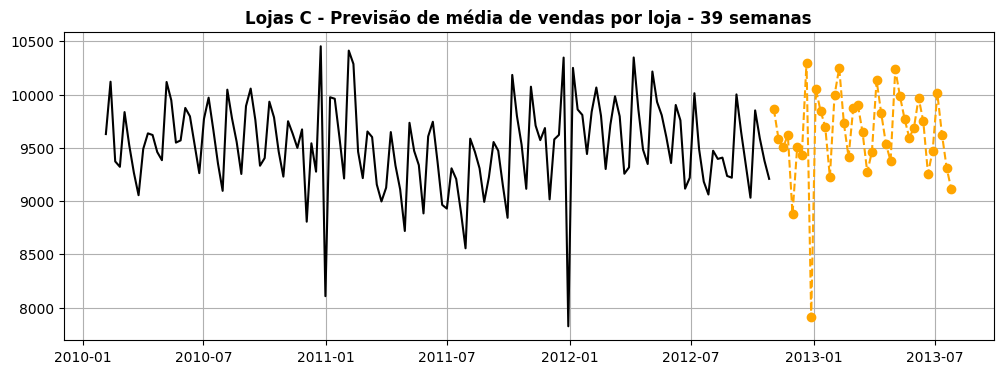

In [ ]:
forecast_c = modelo_sarimax_cx.get_forecast(steps=39, exog=teste_loja_C['IsHoliday'])
forecast_mean_c = forecast_c.predicted_mean
forecast_ci_c = forecast_c.conf_int()
plt.figure(figsize=(12,4))
plt.plot(forecast_mean_c,'o--', color='orange')
plt.plot(treino_c2['Weekly_Sales'], color='black')
plt.title("Lojas C - Previsão de média de vendas por loja - 39 semanas", fontweight='bold')
plt.grid()
plt.savefig("previsao_c.png")
plt.show()

# **9. Analisando os departamentos das lojas**

In [ ]:
base.head(1)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,Unemployment,Agrupamento_temperatura,Day,Month,Year,Total_Flags_MarkDown,Categ_Size
0,1,1,2010-02-05,24924.5,0,A,151315,42.31,2.572,8.106,40 - 59.99,5,2,2010,0,140000 - 169999


In [ ]:
base.Dept.value_counts()

Dept
1     6435
16    6435
92    6435
38    6435
40    6435
      ... 
78     235
77     150
65     143
39      16
43      12
Name: count, Length: 81, dtype: int64

In [ ]:
# 10 maiores médias de vendas dos departamentos
base.groupby("Dept")['Weekly_Sales'].mean().sort_values(ascending=False).head(10)

Dept
92    75204.870531
95    69824.423080
38    61090.619568
72    50566.515417
65    45441.706224
90    45232.084488
40    44900.702727
2     43607.020113
91    33687.910758
94    33405.883963
Name: Weekly_Sales, dtype: float64

In [ ]:
# 10 maiores vendas dos departamentos (total)
base.groupby("Dept")['Weekly_Sales'].sum().sort_values(ascending=False).head(10)

Dept
92    4.839433e+08
95    4.493202e+08
38    3.931181e+08
72    3.057252e+08
90    2.910685e+08
40    2.889360e+08
2     2.806112e+08
91    2.167817e+08
13    1.973216e+08
8     1.942808e+08
Name: Weekly_Sales, dtype: float64

#### **Analisando os departamentos: 92, 95, 38, 72 e 90**

In [ ]:
analise_dept = base[['Date','Dept','Weekly_Sales']].copy()
analise_dept = analise_dept.set_index("Date")

dept_92 = analise_dept.query('Dept == 92').copy()
dept_92 = dept_92.groupby(dept_92.index)['Weekly_Sales'].mean()
dept_95 = analise_dept.query('Dept == 95').copy()
dept_95 = dept_95.groupby(dept_95.index)['Weekly_Sales'].mean()
dept_38 = analise_dept.query('Dept == 38').copy()
dept_38 = dept_38.groupby(dept_38.index)['Weekly_Sales'].mean()
dept_72 = analise_dept.query('Dept == 72').copy()
dept_72 = dept_72.groupby(dept_72.index)['Weekly_Sales'].mean()
dept_90 = analise_dept.query('Dept == 90').copy()
dept_90 = dept_90.groupby(dept_90.index)['Weekly_Sales'].mean()

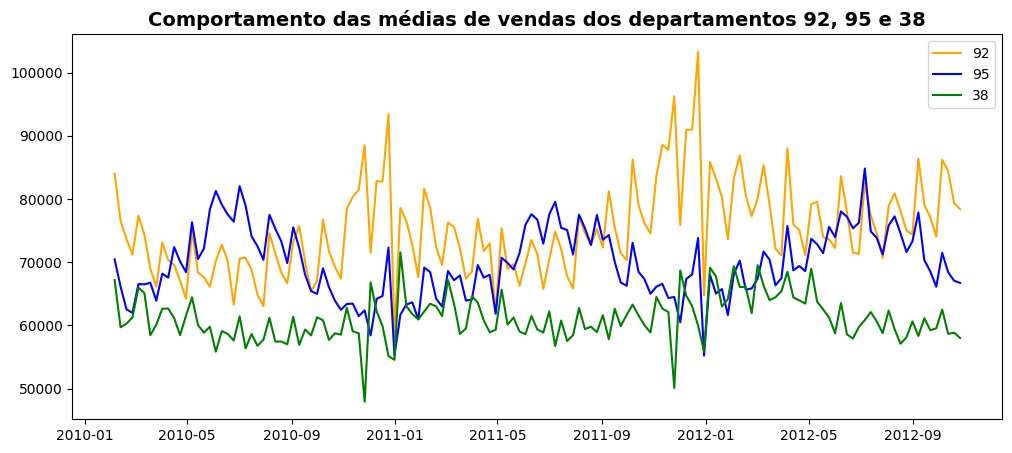

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Comportamento das médias de vendas dos departamentos 92, 95 e 38",fontsize=14, fontweight='bold')
plt.plot(dept_92, color='orange',label='92')
plt.plot(dept_95, color='blue',label='95')
plt.plot(dept_38, color='green',label='38')
plt.legend()
plt.savefig("serie_temporal_dept.png")
plt.show()

**Como podemos ver, as médias de vendas semanais mudam quando comparamos diferentes departamentos. Portanto, se tratando de um comércio é interessante analisar cada um mais afundo**

# **10. Fazendo uma previsão de vendas do Departamento 95**

### **1. Decompsição da série**

In [ ]:
dept_95 = base.query('Dept == 95').copy()
dept_95 = dept_95.set_index("Date")
dept_95 = dept_95.groupby(dept_95.index)["Weekly_Sales"].mean()

datas_e_feriados = base[['Date','IsHoliday']].copy()
datas_e_feriados = datas_e_feriados.drop_duplicates(subset='Date')

dept_95 = pd.merge(dept_95, datas_e_feriados, left_on=dept_95.index, right_on='Date',how='left')
dept_95 = dept_95.set_index('Date')
dept_95.head()

,Weekly_Sales,IsHoliday
Date,,
2010-02-05,70456.220667,0
2010-02-12,66136.651333,1
2010-02-19,62534.173111,0
2010-02-26,61986.936222,0
2010-03-05,66540.872000,0


In [ ]:
decomposicao_dept_95 = seasonal_decompose(dept_95['Weekly_Sales'], model='aditive')

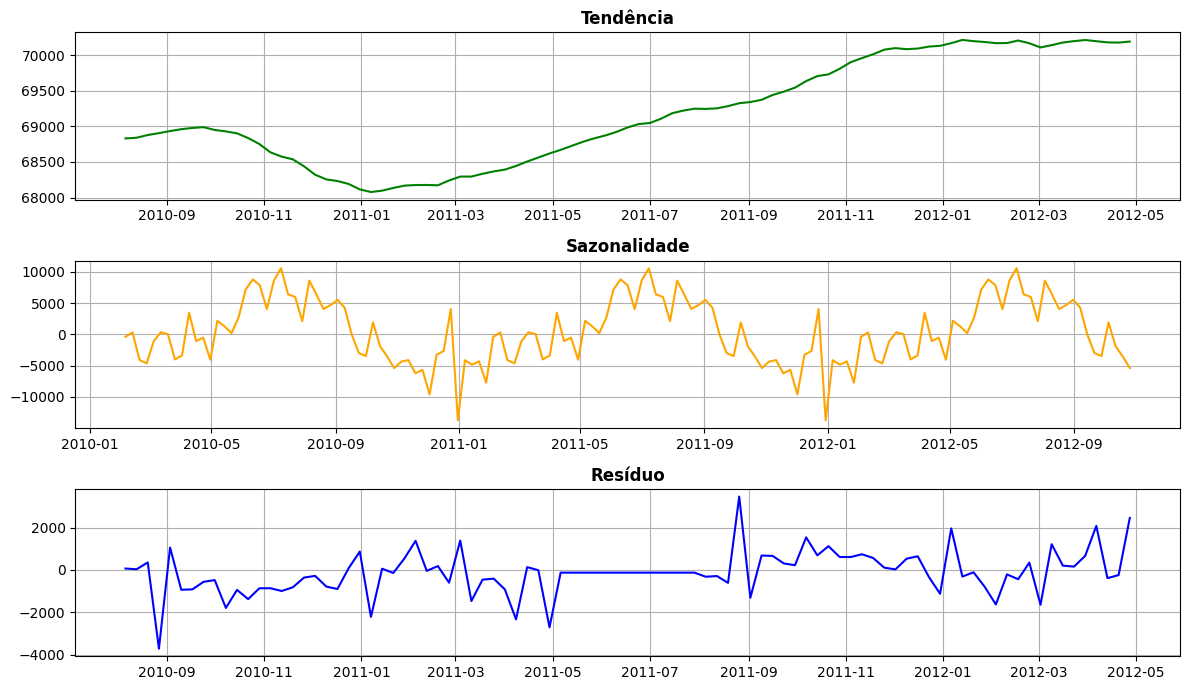

In [ ]:
fig, ax = plt.subplots(nrows=3, figsize=(12,7), tight_layout=True)
ax[0].plot(decomposicao_dept_95.trend, color='green')
ax[0].set_title("Tendência", fontweight='bold')
ax[1].plot(decomposicao_dept_95.seasonal, color='orange')
ax[1].set_title("Sazonalidade", fontweight='bold')
ax[2].plot(decomposicao_dept_95.resid, color='blue')
ax[2].set_title("Resíduo", fontweight='bold')

ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.show()

### **2. ACF e PACF - Autocorrelações**

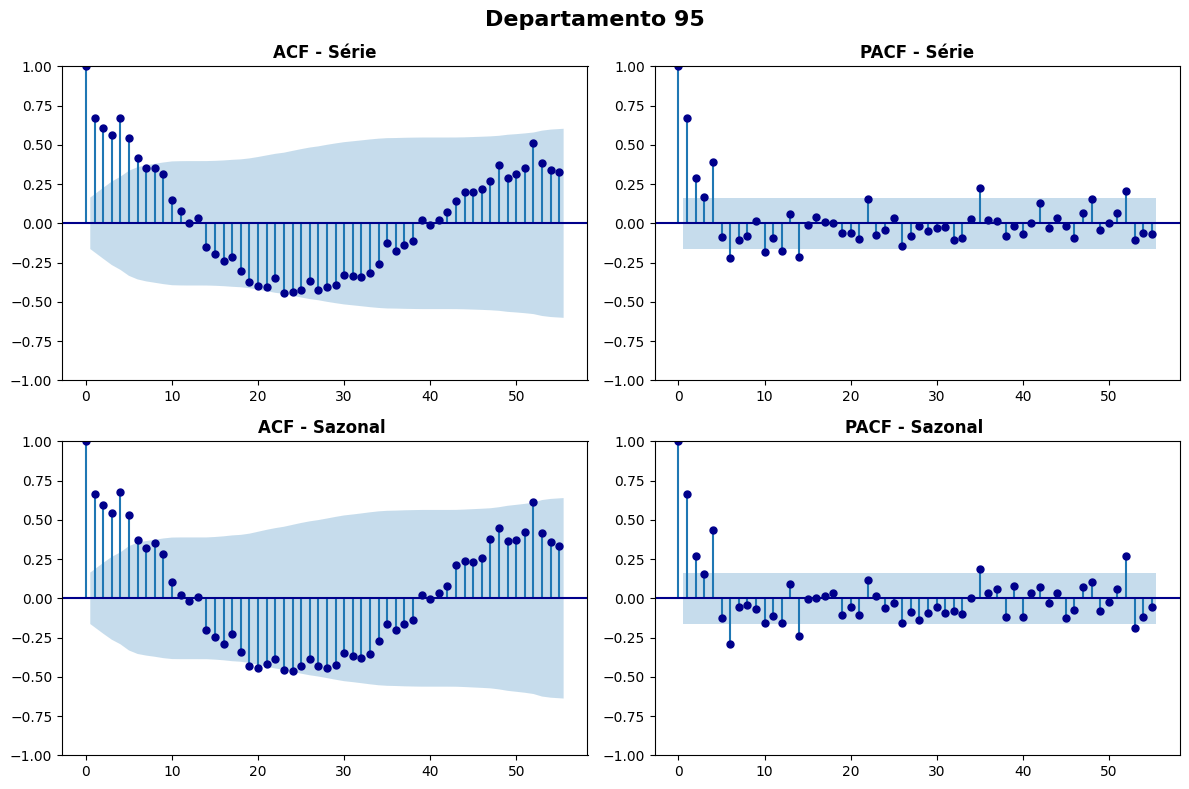

In [ ]:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(12,8), tight_layout=True)

plot_acf(dept_95[['Weekly_Sales']], lags=55, ax=ax[0][0], color='darkblue')
plot_pacf(dept_95[['Weekly_Sales']], lags=55, ax=ax[0][1], color='darkblue')

plot_acf(decomposicao_dept_95.seasonal, lags=55, ax=ax[1][0], color='darkblue')
plot_pacf(decomposicao_dept_95.seasonal, lags=55, ax=ax[1][1], color='darkblue')

ax[0][0].set_title("ACF - Série",fontsize=12, fontweight='bold')
ax[0][1].set_title("PACF - Série",fontsize=12, fontweight='bold')
ax[1][0].set_title("ACF - Sazonal ",fontsize=12, fontweight='bold')
ax[1][1].set_title("PACF - Sazonal ",fontsize=12, fontweight='bold')

plt.suptitle("Departamento 95", fontsize=16, fontweight='bold')
plt.savefig("acf_pacf_dept_95.png")
plt.show()

### **3. ADF - Teste de Estacionariedade**

In [ ]:
teste_serie_dept_95 = adfuller(dept_95['Weekly_Sales'])

print("Estatística ADF:     ", teste_serie_dept_95[0])
print("P-value:             ", teste_serie_dept_95[1])
print("Valores críticos:    ", teste_serie_dept_95[4])
print("")

Estatística ADF:      -4.282218119017243
P-value:              0.0004767847317222905
Valores críticos:     {'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275}



In [ ]:
kpss_dept_95 = kpss(dept_95['Weekly_Sales'], nlags=4)
print('Estatística KPSS:', kpss_dept_95[0])
print('Valor p:', kpss_dept_95[1])
print('Lags utilizados:', kpss_dept_95[2])
print('Valores críticos:', kpss_dept_95[3])

Estatística KPSS: 0.19382027488581394
Valor p: 0.1
Lags utilizados: 4
Valores críticos: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


**Os resultados indicam uma chance maior da série ser estacionária.**

### **4. Visualização - Suavização com Médias Móveis**

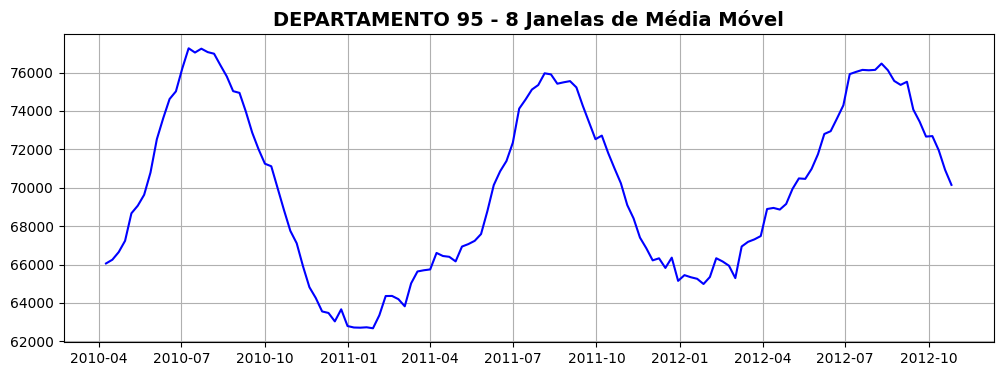

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(dept_95['Weekly_Sales'].rolling(10).mean(), color='blue')
ax.set_title('DEPARTAMENTO 95 - 8 Janelas de Média Móvel', fontsize=14, fontweight='bold')
ax.grid()
plt.show()

### **5. Criação de um Modelo SARIMAX para validação**

#### **Separando em treino e teste**

In [ ]:
dept_95.shape

(143, 2)

In [ ]:
dept_95_treino = dept_95[:118]
dept_95_validacao = dept_95[118:]

#### **Modelo**

In [ ]:
modelo_dept_95 = SARIMAX(dept_95_treino['Weekly_Sales'], order=(4, 0, 1), seasonal_order=(1, 1, 1, 52),exog=dept_95_treino['IsHoliday'])
modelo_sarimax_dept_95 = modelo_dept_95.fit()

In [ ]:
modelo_sarimax_dept_95.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  118
Model:             SARIMAX(4, 0, 1)x(1, 1, 1, 52)   Log Likelihood                -624.942
Date:                            Mon, 06 May 2024   AIC                           1267.884
Time:                                    23:11:26   BIC                           1287.590
Sample:                                02-05-2010   HQIC                          1275.671
                                     - 05-04-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
IsHoliday   8.427e-05    111.761   7.54e-07      1.000    -219.048     219.048
ar.L1          0.9080      0.229      3.972      0.000       0.460       1.356
ar.L2          0.0247      0.156      0.158      0.874      -0.281       0.330
ar.L3          0.0353      0.153      0.231      0.818      -0.265       0.336
ar.L4         -0.0574      0.079     -0.727      0.467      -0.212       0.097
ma.L1         -0.9052      0.220     -4.123      0.000      -1.336      -0.475
ar.S.L52       0.9865      5.392      0.183      0.855      -9.581      11.554
ma.S.L52      -0.9841      5.500     -0.179      0.858     -11.763       9.795
sigma2      5.697e+06      0.002   3.18e+09      0.000     5.7e+06     5.7e+06
===================================================================================
Ljung-Box (L1) (Q):                   8.36   Jarque-Bera (JB):                 2.84
Prob(Q):                              0.00   Prob(JB):                         0.24
Heteroskedasticity (H):               0.83   Skew:                            -0.49
Prob(H) (two-sided):                  0.67   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.52e+25. Standard errors may be unstable.
"""

#### **Resíduos**

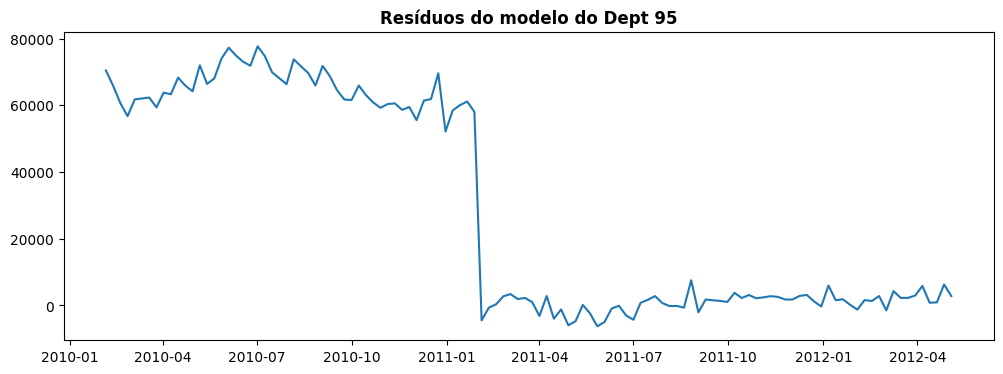

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(modelo_sarimax_dept_95.resid)
plt.title("Resíduos do modelo do Dept 95", fontweight='bold')
plt.show()

Ao aumentar a diferenciação "D" houve uma mudança nos resíduos que deixaram de ficar próximos 0. Passaram a variar entre 60000 e 80000 e depois cair. Porém, optei por deixar este pela melhor resposta nas previsões.

#### **Previsão**

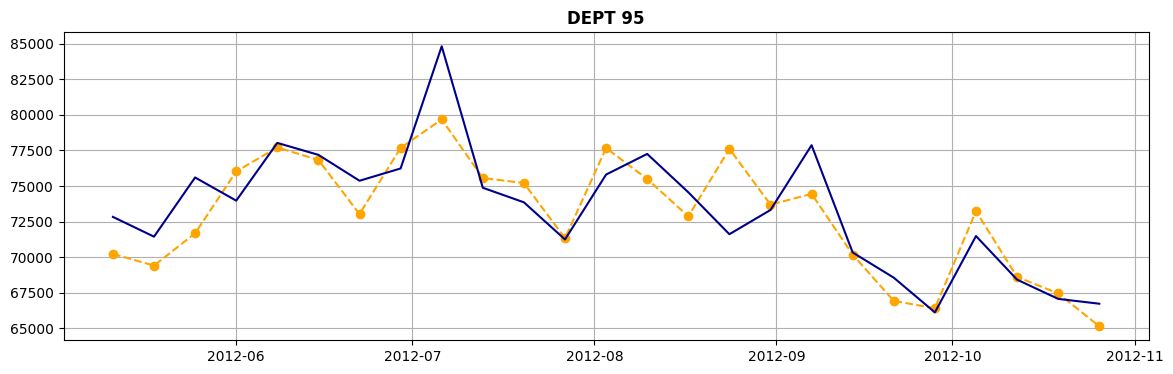

In [ ]:
forecast = modelo_sarimax_dept_95.get_forecast(steps=25, exog=dept_95_validacao['IsHoliday'])
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(14,4))
plt.plot(forecast_mean,'o--', color='orange')
plt.plot(dept_95_validacao['Weekly_Sales'], color='darkblue')
plt.title("DEPT 95", fontweight='bold')
plt.grid()
plt.savefig("previsao_dept95.png")
plt.show()

**Com essa previsão, podemos ter uma noção melhor de fatores como a demanda de produtos desse departamento.**

### **6. Avaliando os resultados da validação**

In [ ]:
resultados_dept_45 = pd.DataFrame({"Real":dept_95_validacao.Weekly_Sales,"Previsto":forecast_mean})
resultados_dept_45.head()

,Real,Previsto
2012-05-11,72828.365778,70225.341146
2012-05-18,71438.019111,69404.492114
2012-05-25,75598.230222,71676.726417
2012-06-01,73970.162000,76020.408575
2012-06-08,78028.295333,77712.038831


In [ ]:
MAE_dept_45 = mean_absolute_error(dept_95_validacao['Weekly_Sales'], forecast_mean)
MSE_dept_45 = mean_squared_error(dept_95_validacao['Weekly_Sales'], forecast_mean)

print("Valor médio das 25 previsões - Tipo A: ", forecast_mean.mean())
print("")
print("O Erro Médio Absoluto do modelo Sarima_A é: ", round(MAE_dept_45,1))
print(" ")
print("A Raiz do Erro Médio Quadrático do modelo Sarima_A é: ", round(np.sqrt(MSE_dept_45),1))
print("")
print("Diferença média da previsão comparada a média das previsões - Sarima_A: ", round((MAE_dept_45/forecast_mean.mean())*100,2),"%")

Valor médio das 25 previsões - Tipo A:  72961.6130601574

O Erro Médio Absoluto do modelo Sarima_A é:  1736.9
 
A Raiz do Erro Médio Quadrático do modelo Sarima_A é:  2305.0

Diferença média da previsão comparada a média das previsões - Sarima_A:  2.38 %


### **7. Criando novo modelo e prevendo a base de teste**

In [ ]:
teste.head(1)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False


In [ ]:
def funcao_transformar_dados_dept(departamento, base_teste):
  base_dept = base_teste.loc[base_teste.Dept == departamento].copy()
  base_dept['Date'] = pd.to_datetime(base_dept['Date'], format="%Y-%m-%d")
  base_dept['IsHoliday'] = base_dept['IsHoliday'].apply(lambda x:1 if x == True else 0)
  base_dept = base_dept[['Date','IsHoliday']].copy()
  base_dept = base_dept.drop_duplicates(subset="Date")
  base_dept = base_dept.set_index('Date')

  return base_dept

In [ ]:
prever_dept_95 = funcao_transformar_dados_dept(95, teste)
prever_dept_95.head(3)

,IsHoliday
Date,
2012-11-02,0
2012-11-09,0
2012-11-16,0


#### **Criando o modelo e fazendo as previsões**

In [ ]:
dept_95.head(3)

,Weekly_Sales,IsHoliday
Date,,
2010-02-05,70456.220667,0
2010-02-12,66136.651333,1
2010-02-19,62534.173111,0


In [ ]:
modelo_dept_95 = SARIMAX(dept_95['Weekly_Sales'], order=(1, 0, 1), seasonal_order=(1, 1, 1, 52),exog=dept_95['IsHoliday'])
modelo_sarimax_dept_95 = modelo_dept_95.fit()

In [ ]:
modelo_sarimax_dept_95.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 52)   Log Likelihood                -854.508
Date:                            Mon, 06 May 2024   AIC                           1721.015
Time:                                    23:11:53   BIC                           1736.081
Sample:                                02-05-2010   HQIC                          1727.093
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
IsHoliday  -8.477e-07    178.156  -4.76e-09      1.000    -349.179     349.179
ar.L1          0.5728      1.172      0.489      0.625      -1.725       2.871
ma.L1         -0.5468      1.244     -0.440      0.660      -2.984       1.891
ar.S.L52       0.9890      0.524      1.888      0.059      -0.038       2.016
ma.S.L52      -0.9819      0.591     -1.661      0.097      -2.141       0.177
sigma2      6.112e+06      0.003    2.1e+09      0.000    6.11e+06    6.11e+06
===================================================================================
Ljung-Box (L1) (Q):                   9.03   Jarque-Bera (JB):                 4.35
Prob(Q):                              0.00   Prob(JB):                         0.11
Heteroskedasticity (H):               0.55   Skew:                            -0.47
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.48e+25. Standard errors may be unstable.
"""

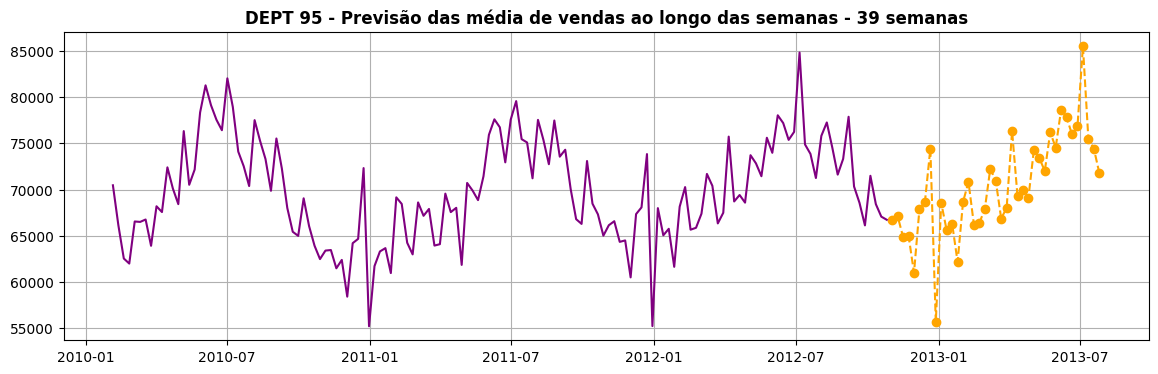

In [ ]:
forecast_dept_95 = modelo_sarimax_dept_95.get_forecast(steps=39, exog=prever_dept_95['IsHoliday'])
forecast_mean_dept_95 = forecast_dept_95.predicted_mean
forecast_ci_dept_95 = forecast_dept_95.conf_int()

plt.figure(figsize=(14,4))
plt.plot(forecast_mean_dept_95,'o--', color='orange')
plt.plot(dept_95['Weekly_Sales'], color='purple')
plt.title("DEPT 95 - Previsão das média de vendas ao longo das semanas - 39 semanas", fontweight='bold')
plt.grid()
plt.savefig("previsao_dept_95_teste.png")
plt.show()

# **11. Conclusão**

Fiz esse projeto com o intuito de colocar em prática meus estudos de Séries Temporais, com seus modelos e componentes, pois é uma área que não é tão fácil de se estudar/entender (Pelo menos no início), portanto, foi uma experiência interessante, aprendi bastante, e tenho em mente que quero aprender mais.

Desde o notebook 1, foram analisados fatores a parte como: temperatura, taxa de desemprego, campanhas com descontos e outras variáveis. Com esses dados, foi possível caterorizá-los e analisar suas influencias em cima da coluna target, que é a de venda semanal.

Analisando os insights gerados nesse notebook, podemos ver que há diferenças nas séries temporais de lojas e departamentos, ou seja, é interessante analisarmos com mais cautela cada caso, e não generalizar uma série para tudo. Assim, podemos ter um planejamento mais detalhado de questões de estoque, demanda, preços e outros fatores ligados ao comércio

